# CIS API demonstration notebook

30 minutes - covering ...?

## Reading data is really easy

In [1]:
from cis import read_data, read_data_list

help(read_data)

Help on function read_data in module cis:

read_data(filenames, variable, product=None)
    Read a specific variable from a list of files
    Files can be either gridded or ungridded but not a mix of both.
    First tries to read data as gridded, if that fails, tries as ungridded.
    
    :param filenames:   The filenames of the files to read. This can be either a single filename as a string, a comma
     separated list, or a :class:`list` of string filenames. Filenames can include directories which will be expanded to
     include all files in that directory, or wildcards such as ``*`` or ``?``.
    :type filenames: string or list
    :param str variable: The variable to read from the files
    :param str product:  The name of the data reading plugin to use to read the data (e.g. ``Cloud_CCI``).
    :return:  The specified data as either a :class:`GriddedData` or :class:`UngriddedData` object.



In [2]:
data_path = "/Users/watson-parris/Local Data/WorkshopData2016/ARCPAC_2008/*.nc"

NC = read_data(data_path, "NUMBER_CONCENTRATION")

# Note we can also use from cis.data_io.products.AProduct import get_variables to find the variables in a file.

Let's take a look at the methods available on the data:

In [3]:
help(NC)  # Note the class heirarchy. 

Help on UngriddedData in module cis.data_io.ungridded_data object:

class UngriddedData(LazyData, cis.data_io.common_data.CommonData)
 |  Wrapper (adaptor) class for the different types of possible ungridded data.
 |  
 |  Method resolution order:
 |      UngriddedData
 |      LazyData
 |      cis.data_io.common_data.CommonData
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data, metadata, coords, data_retrieval_callback=None)
 |      Constructor
 |      
 |      :param data: The data handler (e.g. SDS instance) for the specific data type, or a numpy array of data.
 |       This can be a list of data handlers, or a single data handler
 |      :param metadata: Any associated metadata
 |      :param coords: A list of the associated Coord objects
 |      :param data_retrieval_callback: A method for retrieving data when needed
 |  
 |  __str__(self)
 |  
 |  __unicode__(self)
 |  
 |  as_data_frame(self, copy=True)
 |      Convert an UngriddedData object 

In [4]:
print NC  # Note the warning below

Ungridded data: NUMBER_CONCENTRATION / (#/cm3) 
     Shape = (1268,)

     Total number of points = 1268
     Number of non-masked points = 1268
     Long name = 
     Standard name = NUMBER_CONCENTRATION
     Units = #/cm3
     Missing value = -9999
     Range = (17.0, 2191.0)
     History = 
     Coordinates: 
       time
          Long name = 
          Standard name = time
          Units = days since 1600-01-01 00:00:00
          Calendar = gregorian
          Missing value = -9999
          Range = ('2008-04-11 20:01:30.000001', '2008-04-16 03:03:30')
          History = 
       latitude
          Long name = 
          Standard name = latitude
          Units = degrees
          Missing value = -9999
          Range = (63.303199999999997, 75.128600000000006)
          History = 
       longitude
          Long name = 
          Standard name = longitude
          Units = degrees
          Missing value = -9999
          Range = (-165.1241, -139.23159999999999)
          History 

We can also access the data directly:

In [6]:
print NC.data

[2191.0 581.0 306.0 ..., 221.0 220.0 187.0]


In [7]:
print NC.data[0]

2191.0


In [10]:
print NC[0:99]

TypeError: 'UngriddedData' object has no attribute '__getitem__'

And the coordinates:

In [9]:
for c in NC.coords():
    print c.name(), c.data

time [ 149120.834375    149120.83506944  149120.83576389 ...,  149125.12604167
  149125.12673611  149125.12743056]
latitude [ 64.8029  64.7594  64.7385 ...,  64.8948  64.8635  64.8336]
longitude [-147.8828 -147.9471 -148.0415 ..., -147.7128 -147.7722 -147.8285]
altitude [  233.4   652.9  1099.1 ...,   682.1   435.8   203.5]


**Note** in the above that one of the calls is to a method, and the other is to a data attribute. See the help output above.

We can also look at the metadata:

In [11]:
print NC.metadata

     Long name = 
     Standard name = NUMBER_CONCENTRATION
     Units = #/cm3
     Missing value = -9999
     Range = (17.0, 2191.0)
     History = 



Or edit it:

In [12]:
NC.metadata.history += 'DWP removed the zero-values\n'
print NC.metadata  

     Long name = 
     Standard name = NUMBER_CONCENTRATION
     Units = #/cm3
     Missing value = -9999
     Range = (17.0, 2191.0)
     History = DWP removed the zero-values




Note the `\n` above - this is a line break, and ensures that when we add another line to the history the lines won't run into each other.

## Using Pandas with CIS data

Pandas (http://pandas.pydata.org) is a free, open-source library for data analysis and offers powerful tools similar to R. 

It's particularly good for working with time series.

We can easily convert CIS data into pandas data to take advantage of this time-series functionality:

In [13]:
df = NC.as_data_frame()

In [14]:
df

,altitude,latitude,longitude,NUMBER_CONCENTRATION
2008-04-11 20:01:30.000001,233.4,64.8029,-147.8828,2191
2008-04-11 20:02:30.000000,652.9,64.7594,-147.9471,581
2008-04-11 20:03:30.000000,1099.1,64.7385,-148.0415,306
2008-04-11 20:04:30.000000,1496.7,64.7820,-148.1129,281
2008-04-11 20:05:30.000000,1877.5,64.8434,-148.1207,246
2008-04-11 20:06:30.000000,2245.8,64.9073,-148.1275,230
2008-04-11 20:07:30.000000,2638.7,64.9720,-148.1360,241
2008-04-11 20:08:30.000016,3013.7,65.0354,-148.1538,197
2008-04-11 20:09:30.000012,3275.1,65.1007,-148.1691,209
2008-04-11 20:10:30.000009,3411.1,65.1700,-148.1806,194


Now we can do cool Pandas stuff!

In [15]:
df.mean()

altitude                2671.365300
latitude                  68.334602
longitude               -151.828151
NUMBER_CONCENTRATION     314.305810
dtype: float64

In [16]:
df['NUMBER_CONCENTRATION'].max()

2191.0

In [17]:
df.ix[df['NUMBER_CONCENTRATION'].argmin()]

altitude                2916.1000
latitude                  73.2817
longitude               -153.3266
NUMBER_CONCENTRATION      17.0000
Name: 2008-04-12 23:49:30, dtype: float64

In [18]:
df.resample('5min', how='mean')

,altitude,latitude,longitude,NUMBER_CONCENTRATION
2008-04-11 20:00:00,870.525,64.77070,-147.996075,839.750000
2008-04-11 20:05:00,2610.160,64.97176,-148.141420,224.600006
2008-04-11 20:10:00,3411.580,65.31194,-148.192380,185.199997
2008-04-11 20:15:00,3409.580,65.66350,-148.235960,170.600006
2008-04-11 20:20:00,3406.460,66.01632,-148.284860,286.000000
2008-04-11 20:25:00,3404.320,66.37504,-148.330820,242.000000
2008-04-11 20:30:00,3403.640,66.73098,-148.379880,148.800003
2008-04-11 20:35:00,3402.740,67.09088,-148.422520,151.399994
2008-04-11 20:40:00,3400.620,67.45660,-148.472620,173.800003
2008-04-11 20:45:00,3397.700,67.82766,-148.519480,169.000000


# And more plot types

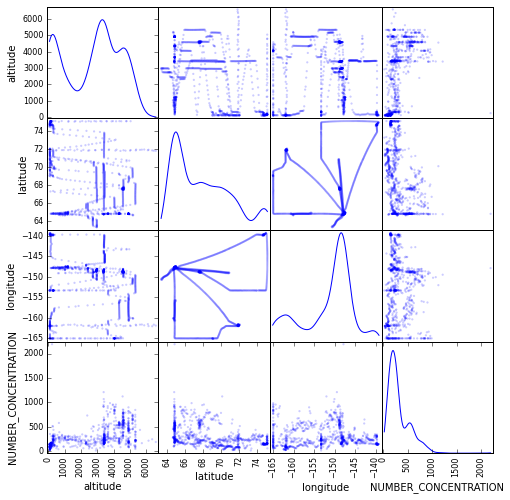

In [19]:
%matplotlib inline

from pandas.tools.plotting import scatter_matrix
m = scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='kde', edgecolors='none')

## Accessing CIS functionality - BETA

### Plotting

We can also use the built in plotting routines (although they need a bit of tidying up):

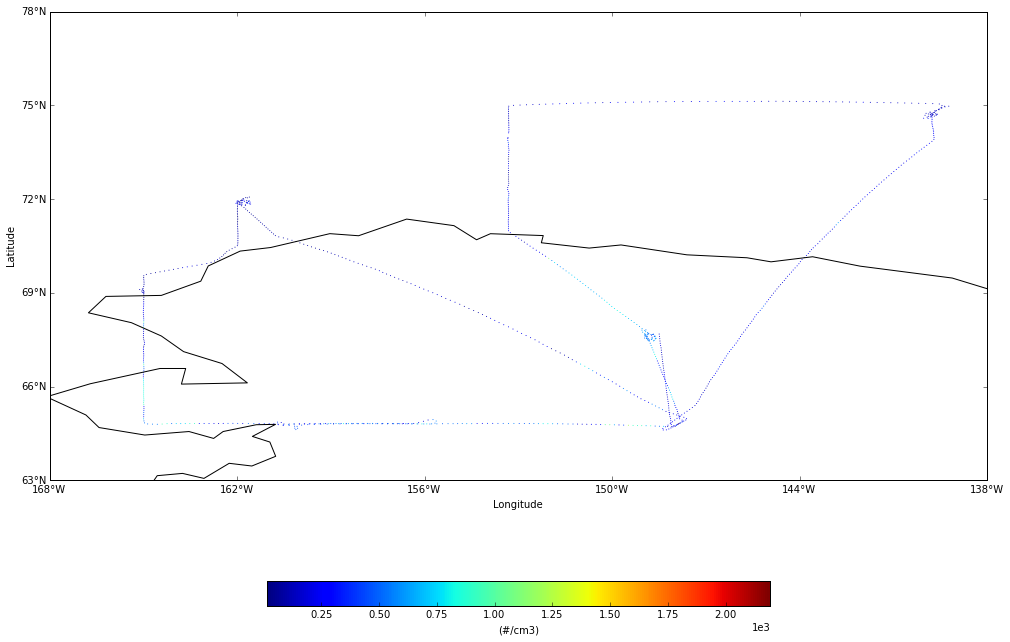

In [20]:
from cis.plotting.plot import Plotter
%matplotlib inline

Plotter([NC],x_variable='longitude',y_variable='latitude',plotwidth=18,plotheight=12,cbarscale=0.5,datagroups=[{'itemstyle':'', 'cmap':'jet', 'edgecolor':''}])

### Subsetting

Here we use the subset routine to subset the data in latitude:

In [ ]:
from cis.subsetting import Subset
from cis.subsetting.subset_limits import SubsetLimits

from cis.data_io.data_reader import expand_filelist

sub=Subset({'x': SubsetLimits(-10.0,10.0, False)} ,'EUCAARI_subset.nc')

sub.subset("BC_MASS", expand_filelist(data_path), None)

And then plot the result:

In [ ]:
BC_MASS_sub = read_data("cis-EUCAARI_subset.nc", "BC_MASS")

Plotter([BC_MASS_sub],x_variable='longitude',y_variable='latitude',xrange={'xmin':-12,'xmax':12},plotwidth=18,plotheight=12,cbarscale=1.0,datagroups=[{'itemstyle':'', 'cmap':'jet', 'edgecolor':''}])